# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key


# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 581


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
 # Set the API base URL
base_url = "https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes
    if i % 50 == 0 and i >= 50:
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city's name and API key
    city_url = base_url.format(city=city, weather_api_key=weather_api_key)

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Make the API request
        response = requests.get(city_url)

        # Check if the city was found (status code 200)
        if response.status_code == 200:
            # Parse the JSON and retrieve data
            city_weather = response.json()

            # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
            city_lat = city_weather["coord"]["lat"]
            city_lng = city_weather["coord"]["lon"]
            city_max_temp = city_weather["main"]["temp_max"]
            city_humidity = city_weather["main"]["humidity"]
            city_clouds = city_weather["clouds"]["all"]
            city_wind = city_weather["wind"]["speed"]
            city_country = city_weather["sys"]["country"]
            city_date = city_weather["dt"]

            # Append the City information into city_data list
            city_data.append({"City": city, 
                              "Lat": city_lat, 
                              "Lng": city_lng, 
                              "Max Temp": city_max_temp,
                              "Humidity": city_humidity,
                              "Cloudiness": city_clouds,
                              "Wind Speed": city_wind,
                              "Country": city_country,
                              "Date": city_date})
            
        else:
            print("City not found. Skipping...")

        

    # If there's any other error, skip the city
    except:
        print("Error occurred. Skipping...")
        pass

# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | papatowai
Processing Record 4 of Set 1 | constantia
Processing Record 5 of Set 1 | tsiombe
Processing Record 6 of Set 1 | west island
Processing Record 7 of Set 1 | fort st. john
Processing Record 8 of Set 1 | ilulissat
Processing Record 9 of Set 1 | amga
Processing Record 10 of Set 1 | ago-are
Processing Record 11 of Set 1 | adamstown
Processing Record 12 of Set 1 | naze
Processing Record 13 of Set 1 | jamestown
Processing Record 14 of Set 1 | minas de marcona
Processing Record 15 of Set 1 | iqaluit
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | tiksi
Processing Record 18 of Set 1 | olonkinbyen
Processing Record 19 of Set 1 | coquimbo
Processing Record 20 of Set 1 | brookings
Processing Record 21 of Set 1 | komsomol'skiy
Processing Record 22 of Set 1 | usinsk
Processing Record 23 of Set 

Processing Record 40 of Set 4 | hermanus
Processing Record 41 of Set 4 | margaret river
Processing Record 42 of Set 4 | hamilton
Processing Record 43 of Set 4 | smithers
Processing Record 44 of Set 4 | meybod
Processing Record 45 of Set 4 | flying fish cove
Processing Record 46 of Set 4 | labytnangi
Processing Record 47 of Set 4 | kidal
Processing Record 48 of Set 4 | edd
Processing Record 49 of Set 4 | santanyi
Processing Record 0 of Set 5 | nemuro
Processing Record 1 of Set 5 | caleta de carquin
Processing Record 2 of Set 5 | arraial do cabo
Processing Record 3 of Set 5 | sitka
Processing Record 4 of Set 5 | bani walid
Processing Record 5 of Set 5 | labrador city
Processing Record 6 of Set 5 | bonga
Processing Record 7 of Set 5 | kerema
Processing Record 8 of Set 5 | alice springs
Processing Record 9 of Set 5 | vuktyl
Processing Record 10 of Set 5 | aksaray
Processing Record 11 of Set 5 | phan rang-thap cham
Processing Record 12 of Set 5 | kataragama
City not found. Skipping...
Proce

Processing Record 31 of Set 8 | sisimiut
Processing Record 32 of Set 8 | zajas
Processing Record 33 of Set 8 | pimentel
Processing Record 34 of Set 8 | bardai
Processing Record 35 of Set 8 | holualoa
Processing Record 36 of Set 8 | usogorsk
Processing Record 37 of Set 8 | ghat
Processing Record 38 of Set 8 | chui
Processing Record 39 of Set 8 | klyuchi
Processing Record 40 of Set 8 | lapao
Processing Record 41 of Set 8 | santarem
Processing Record 42 of Set 8 | ixtapa
Processing Record 43 of Set 8 | stone
Processing Record 44 of Set 8 | north platte
Processing Record 45 of Set 8 | bakanas
Processing Record 46 of Set 8 | taltal
Processing Record 47 of Set 8 | inverloch
Processing Record 48 of Set 8 | manokwari
Processing Record 49 of Set 8 | sarakhs
Processing Record 0 of Set 9 | strelka
Processing Record 1 of Set 9 | newman
Processing Record 2 of Set 9 | inda silase
Processing Record 3 of Set 9 | tura
Processing Record 4 of Set 9 | pljevlja
Processing Record 5 of Set 9 | augusta
Proces

Processing Record 21 of Set 12 | fort wellington
Processing Record 22 of Set 12 | afaahiti
Processing Record 23 of Set 12 | cockburn town
Processing Record 24 of Set 12 | mar del plata
Processing Record 25 of Set 12 | magistral'nyy
Processing Record 26 of Set 12 | spas-demensk
Processing Record 27 of Set 12 | sechura
Processing Record 28 of Set 12 | fuengirola
Processing Record 29 of Set 12 | dilling
Processing Record 30 of Set 12 | doctor juan leon mallorquin
-----------------------------
Data Retrieval Complete
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          560
Lat           560
Lng           560
Max Temp      560
Humidity      560
Cloudiness    560
Wind Speed    560
Country       560
Date          560
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,273.49,99,100,3.86,GS,1690457635
1,port-aux-francais,-49.3500,70.2167,279.47,90,72,17.68,TF,1690457689
2,papatowai,-46.5619,169.4708,280.37,84,100,4.22,NZ,1690457752
3,constantia,44.1833,28.6500,291.53,83,100,9.28,RO,1690457646
4,tsiombe,-25.3000,45.4833,296.01,43,1,7.31,MG,1690458118


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,273.49,99,100,3.86,GS,1690457635
1,port-aux-francais,-49.3500,70.2167,279.47,90,72,17.68,TF,1690457689
2,papatowai,-46.5619,169.4708,280.37,84,100,4.22,NZ,1690457752
3,constantia,44.1833,28.6500,291.53,83,100,9.28,RO,1690457646
4,tsiombe,-25.3000,45.4833,296.01,43,1,7.31,MG,1690458118


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

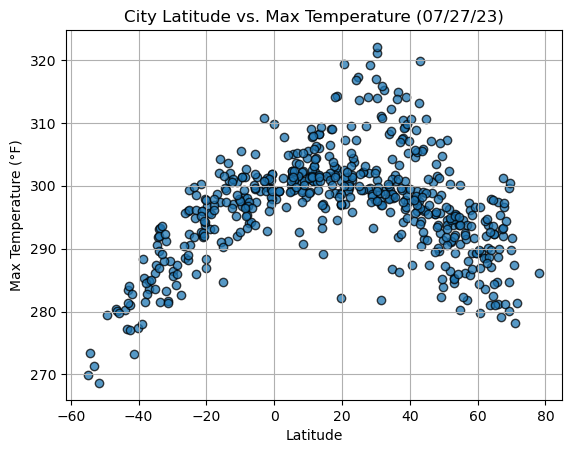

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

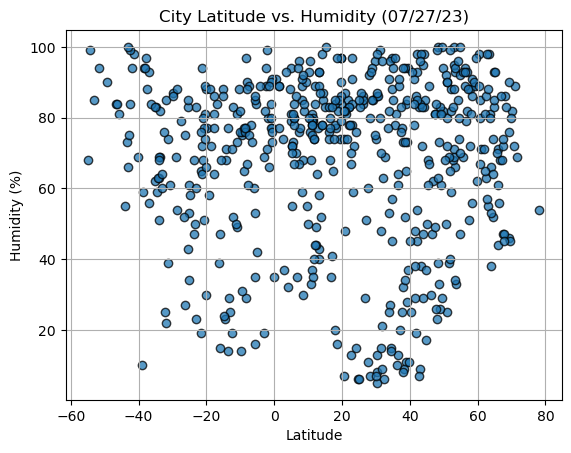

In [10]:
# Build scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

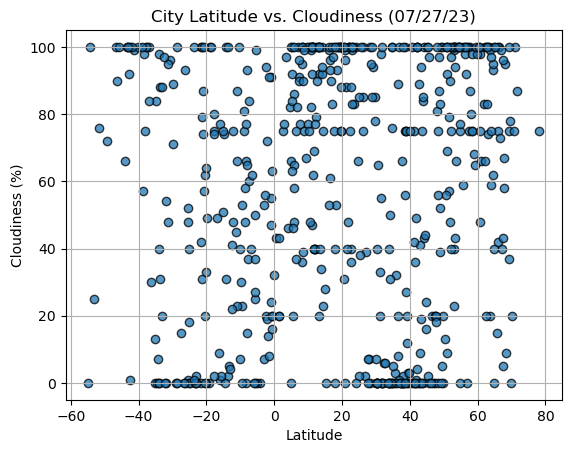

In [11]:
# Build scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

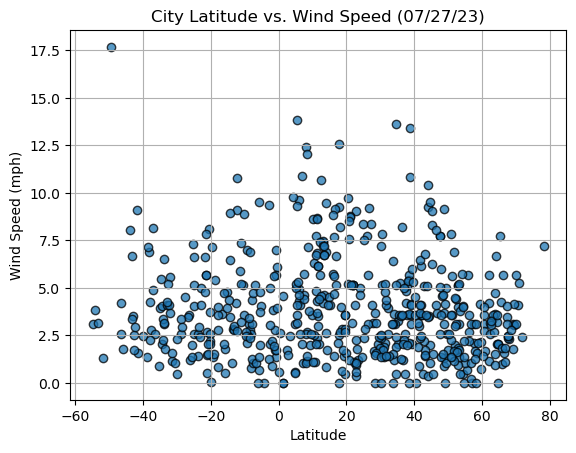

In [12]:
# Build scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
def plot_linear_regression(x, y, xlabel, ylabel):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)

    # Calculate the regression line values
    regression_line = slope * x + intercept

    # Create scatter plot
    plt.scatter(x, y, edgecolor="black", alpha=0.75)

    # Plot the regression line
    plt.plot(x, regression_line, color="red")

    # Incorporate the other graph properties
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f"{xlabel} vs. {ylabel}")
    plt.grid(True)

    # Print the r-value
    print(f"The r-value is: {r_value}")

    # Show plot
    plt.show()


In [14]:
# Filter the DataFrame for Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,constantia,44.1833,28.6500,291.53,83,100,9.28,RO,1690457646
6,fort st. john,56.2499,-120.8529,286.09,94,100,3.60,CA,1690458119
7,ilulissat,69.2167,-51.1000,280.16,76,75,3.09,GL,1690457842
8,amga,60.8953,131.9608,289.47,71,66,1.70,RU,1690457984
9,ago-are,8.5000,3.4167,302.36,68,100,2.69,NG,1690458119


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,273.49,99,100,3.86,GS,1690457635
1,port-aux-francais,-49.3500,70.2167,279.47,90,72,17.68,TF,1690457689
2,papatowai,-46.5619,169.4708,280.37,84,100,4.22,NZ,1690457752
4,tsiombe,-25.3000,45.4833,296.01,43,1,7.31,MG,1690458118
5,west island,-12.1568,96.8225,297.14,83,75,10.80,CC,1690457634


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.5444247708520312


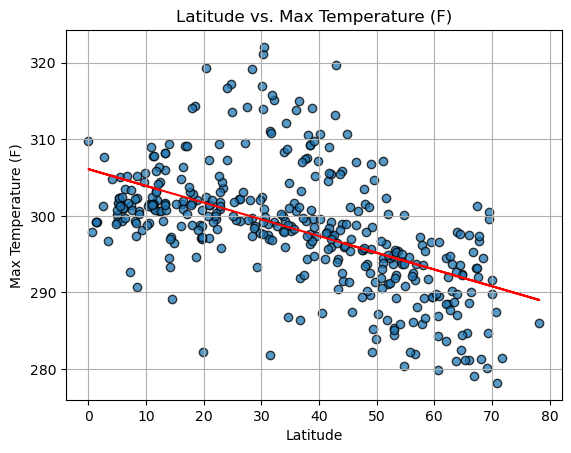

In [16]:
# Linear regression on Northern Hemisphere
# Perform linear regression on Northern Hemisphere data (Latitude vs. Max Temperature)
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Latitude", "Max Temperature (F)")


The r-value is: 0.8544006912559883


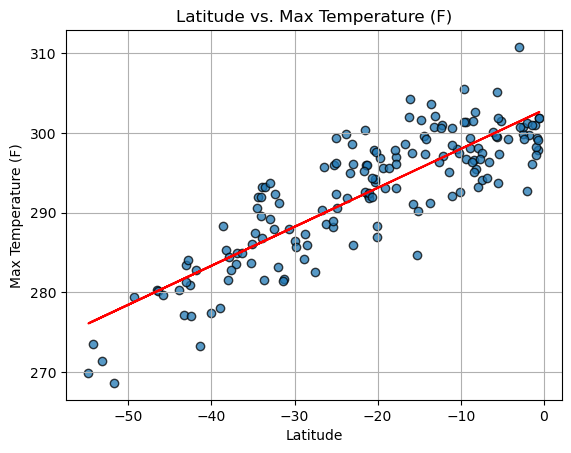

In [17]:
# Perform linear regression on Southern Hemisphere data (Latitude vs. Max Temperature)
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude", "Max Temperature (F)")


**Discussion about the linear relationship:** As latitude either decreases or increases the max temperature on both side starts to decrese. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.0014968746637628854


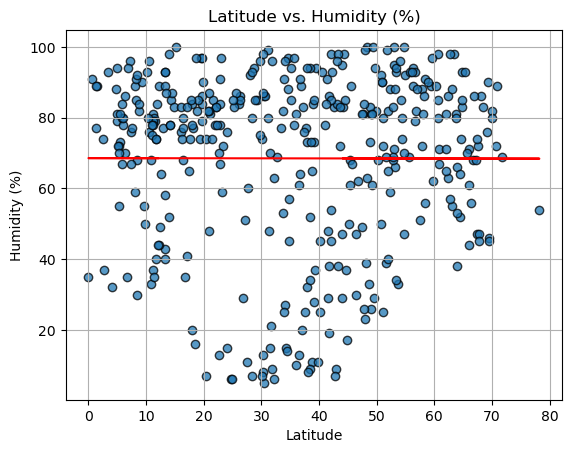

In [18]:
# Perform linear regression on Northern Hemisphere data (Latitude vs. Humidity)
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude", "Humidity (%)")


The r-value is: -0.10370980831827725


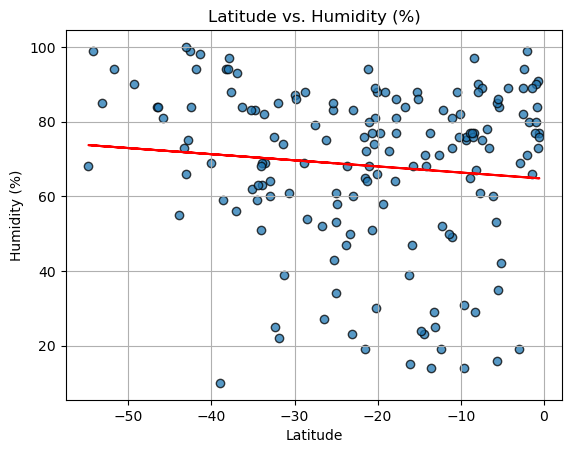

In [19]:
# Perform linear regression on Southern Hemisphere data (Latitude vs. Humidity)
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude", "Humidity (%)")


**Discussion about the linear relationship:** There is a slight negative correlation between humidity and latitude. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.04986195966601251


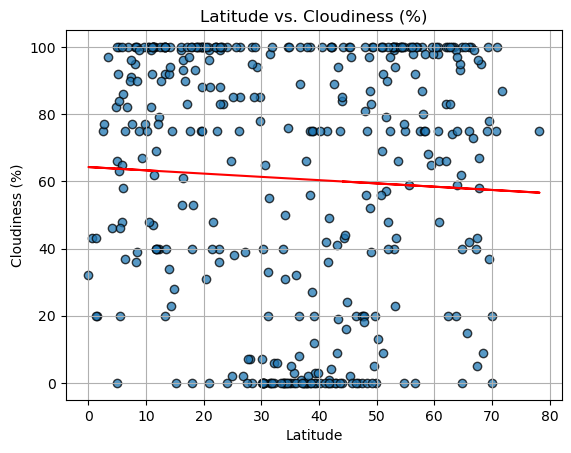

In [20]:
# Perform linear regression on Northern Hemisphere data (Latitude vs. Cloudiness)
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Latitude", "Cloudiness (%)")


The r-value is: -0.2284926538126021


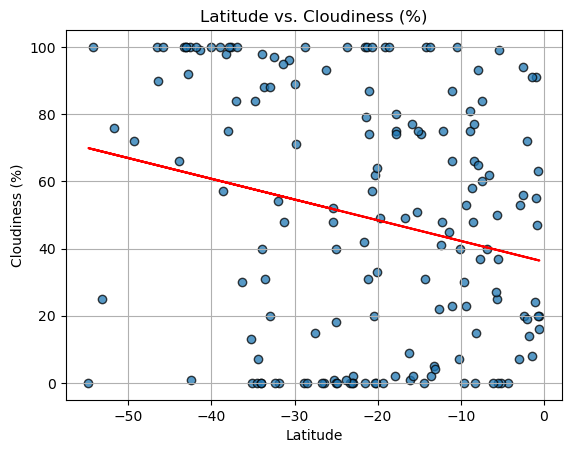

In [21]:
# Perform linear regression on Southern Hemisphere data (Latitude vs. Cloudiness)
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Latitude", "Cloudiness (%)")


**Discussion about the linear relationship:** Again a negative correlation between the two data sets. As you move more towards the equator the Cloudiness goes down.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.22204902045236102


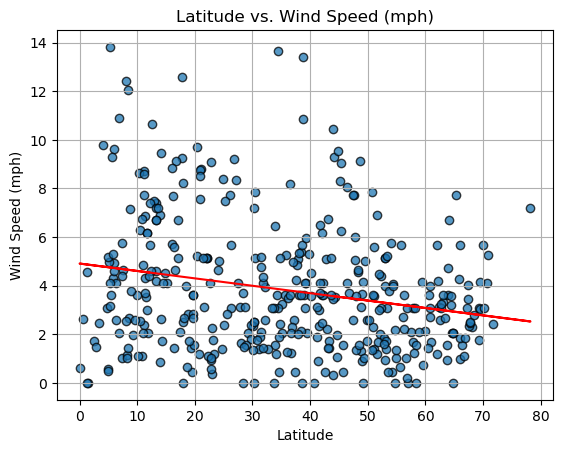

In [22]:
# Perform linear regression on Northern Hemisphere data (Latitude vs. Wind Speed)
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitude", "Wind Speed (mph)")


The r-value is: -0.06723130888935658


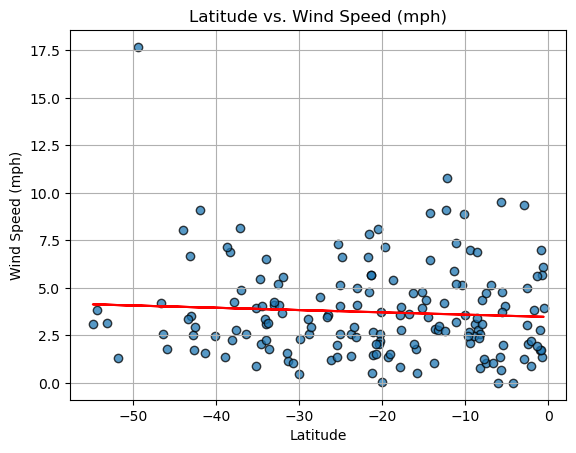

In [23]:
# Perform linear regression on Southern Hemisphere data (Latitude vs. Wind Speed)
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Latitude", "Wind Speed (mph)")


**Discussion about the linear relationship:** Wind speed actually increases as you move away from the equator.